# 4 - Influential Classification Models (and Tools)

## Introduction

This Notebook (2) will continue on from the previous sections. This notebook will go through the process of building the __ResNet__ from scratch. 

## Dataset:

For this part of the project, the CIFAR-100 dataset will be used, it is a collection of of 60,000 32x32 images that have 100 classes. CIFAR-100 was originally collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. It iss also a subset of the 80 million tiny images dataset. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses.

Source: https://www.cs.toronto.edu/~kriz/cifar.html

Further, the TensorFlow team offers a python package called "tensorflow_datasets" that provides the helper function to download tthis dataset as well as other more common ones. For the purposes of this project, the CIFAR-100 dataset will be download with this package.

Source: https://www.tensorflow.org/datasets/catalog/cifar100

## Requirements:
- Tensorflow 2.0 (GPU is better)
- Tensorflow-Hub
- Keras (GPU is better)

### Import the required libraries:

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import timeit

In [2]:
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt

# %matplotlib inline

# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

In [3]:
# Set the random set seed number: for reproducibility.
Seed_nb = 42

### GPU Information:

In [4]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
devices = sess.list_devices()
devices

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:09:00.0, compute capability: 7.5



[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 1616109938786944661),
 _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 6586313605, 5491618663990494630)]

## 1 - Data Preparation:

To use the TensorFlow package, please ensure to install it: "pip install tensorflow-datasets" or use the Anaconda Navigator.

## 1.1 - Download the Dataset:

In [5]:
import tensorflow_datasets as tfds

In [6]:
# Show the different types of datasets available:
tfds.list_builders()

['abstract_reasoning',
 'aflw2k3d',
 'amazon_us_reviews',
 'bair_robot_pushing_small',
 'bigearthnet',
 'binarized_mnist',
 'binary_alpha_digits',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_corrupted',
 'clevr',
 'cnn_dailymail',
 'coco',
 'coco2014',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eurosat',
 'fashion_mnist',
 'flores',
 'food101',
 'gap',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imdb_reviews',
 'iris',
 'kitti',
 'kmnist',
 'lfw',
 'lm1b',
 'lsun',
 'mnist',
 'mnist_corrupted',
 'moving_mnist',
 'multi_nli',
 'nsynth',
 'omniglot',

In [7]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [8]:
# Select the CIFAR-100 dataset:
cifar_builder = tfds.builder("cifar100")
cifar_builder.download_and_prepare()

print(cifar_builder.info)

tfds.core.DatasetInfo(
    name='cifar100',
    version=1.3.1,
    description='This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).',
    urls=['https://www.cs.toronto.edu/~kriz/cifar.html'],
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=tf.int64, num_classes=20),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=100),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multi

From the above printed text, it also shows some useful information such as the number of training and testing samples, the key-names and so on.

## 1.2 - Examine the class labels of the dataset:

In [9]:
# Check out the labels:
print(cifar_builder.info.features["label"].names)

print('The number of classes are: {}'.format(len(cifar_builder.info.features["label"].names)))

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

In [10]:
# Check out the coarse labels:
print(cifar_builder.info.features["coarse_label"].names)

print('The number of classes are: {}'.format(len(cifar_builder.info.features["coarse_label"].names)))

['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']
The number of classes are: 20


## 1.3 - Define the Input Pipeline:

As the dataset have been downloaded with the help of the package, this section will then define the input pipeline for the models to be trained. These are variables that will be used later on.

In [11]:
import math

In [12]:
# Define the Hyperparameters:
input_shape = [224, 224, 3]
batch_size = 512
nb_epochs = 300

In [13]:
# Divide the dataset into training and validation sets:
train_set_cifar = cifar_builder.as_dataset(split = tfds.Split.TRAIN)
test_set_cifar = cifar_builder.as_dataset(split = tfds.Split.TEST)

In [14]:
# Set the number of classes:
nb_classes = cifar_builder.info.features['label'].num_classes

In [15]:
# Define the number of images for training and validation:
nb_train_imgs = cifar_builder.info.splits['train'].num_examples
nb_valid_imgs = cifar_builder.info.splits['test'].num_examples

## 1.4 - Check out the dataset instances:

This should provide some additional details about the dataset, such as its dtype and shape.

In [16]:
print("The Training set instance: {}".format(train_set_cifar))

The Training set instance: <_OptionsDataset shapes: {coarse_label: (), image: (32, 32, 3), label: ()}, types: {coarse_label: tf.int64, image: tf.uint8, label: tf.int64}>


In [17]:
print("The Testing set instance: {}".format(test_set_cifar))

The Testing set instance: <_OptionsDataset shapes: {coarse_label: (), image: (32, 32, 3), label: ()}, types: {coarse_label: tf.int64, image: tf.uint8, label: tf.int64}>


## 2 - Data Preprocessing:

## 2.1 - Shuffling the dataset:

The notion behind shuffling the dataset before being used for training is so that the model is able to learn from majority of the data in the training set, where unshuffled, the training data can be in the format order of A-R while the testing set is S-Z, so during training the model only learns from what is available from A-R but will later perform badly in the unseen testing data of S-Z. Shuffling, as mentioned, allows the model to train in a more robust manner resulting in a better generalised model.

In [18]:
# Shuffle the Training Dataset: 10,000 times of reshuffling.
train_set_cifar = train_set_cifar.repeat(nb_epochs).shuffle(10000)

## 2.2 - Set up the dataset for compatibility with Keras API (non-estimator) and Image Augmentation:

It should be noted that Tensorflow-Dataset returns batches as feature dictionaries, which is expected by Estimators. Therefore, to train with Keras models, it is better to return the batch content as tuples. A user defined funtion will be needed to do this.

In [19]:
def _prepare_data_func(features, input_shape, augment=False):
    """ This builds a pre-processing function to resize the image into the expected dimenions and allows for an
        optional transformation of the images such as augmentations.
    Parameters:
        - features, is the input data.
        - input_shape, is the expected shape for model by resizing.
        - augment, is a Flag to apply random transformations to the input images.
    Returns:
        - returns Augmented images, Labels
    """
    
    # Convert the input images into tensors:
    input_shape = tf.convert_to_tensor(input_shape)
    
    # Convert TF-dataset feature dictionaries into Tuples:
    image = features['image']
    label = features['label']
    
    # Convert the image data type to "float32" and normalise the data to a range between "0 and 1":
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # Data Image Augmentation:
    if augment:
        # Apply random horizontal flip::
        image = tf.image.random_flip_left_right(image)
        
        # Apply Brightness and Saturation changes:
        image = tf.image.random_brightness(image, max_delta = 0.1)
        image = tf.image.random_saturation(image, lower = 0.5, upper = 1.5)
        image = tf.clip_by_value(image, 0.0, 1.0) # this keeps the pixel values in check.
        
        # Apply random resizing and cropping back to expected image sizes:
        random_scale_factor = tf.random.uniform([1], minval = 1., maxval = 1.4, dtype = tf.float32)
        
        scaled_height = tf.cast(tf.cast(input_shape[0], tf.float32) * random_scale_factor, tf.int32)
        scaled_width = tf.cast(tf.cast(input_shape[1], tf.float32) * random_scale_factor, tf.int32)
        scaled_shape = tf.squeeze(tf.stack([scaled_height, scaled_width]))
        
        image = tf.image.resize(image, scaled_shape)
        image = tf.image.random_crop(image, input_shape)
    else:
        image = tf.image.resize(image, input_shape[:2])
        
    return image, label

#### Apply the function above on the training and validation set:

NOTE: functools.partial example -> https://stackoverflow.com/questions/15331726/how-does-functools-partial-do-what-it-does

In [20]:
import functools

##### For Training set:

In [21]:
# Set the function for the training data preparation:
prepare_data_func_for_trainSet = functools.partial(_prepare_data_func, input_shape = input_shape, augment = True)

# Map the function to the dataset:
train_set_cifar = train_set_cifar.map(prepare_data_func_for_trainSet, num_parallel_calls = tf.data.experimental.AUTOTUNE)

# Split the training set into batched samples:
train_set_cifar = train_set_cifar.batch(batch_size)

# Set to prefetch the data: improves the perforamnce.
# his allows later elements to be prepared while the current element is being processed. 
# This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.
train_set_cifar= train_set_cifar.prefetch(1)


##### For Validation set: no augment

In [22]:
# Set the function for the Validation data preparation:
prepare_data_func_for_ValidSet = functools.partial(_prepare_data_func, input_shape = input_shape, augment = False)

# Map the function to the dataset:
test_set_cifar = test_set_cifar.map(prepare_data_func_for_ValidSet, num_parallel_calls = tf.data.experimental.AUTOTUNE)

# Split the Validation set into batched samples:
test_set_cifar = test_set_cifar.batch(batch_size)

# Set to prefetch the data: improves the perforamnce.
# his allows later elements to be prepared while the current element is being processed. 
# This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.
test_set_cifar= test_set_cifar.prefetch(1)


## 2.3 - Set the "steps_per_epoch" for Training and Validation Set:

From the previous code block, the dataset is compatible with Keras methods liike "model.fit()", but will also require the "steps_per_epoch" to be specified. This is the number of batches per epoch of the Dataset objects that has to be specified for the Keras method so that it can work properly together. This is done for the training batches ("steps_per_epoch") and validation batches ("validation_steps").

In [23]:
train_steps_per_epoch = math.ceil(nb_train_imgs / batch_size)

valid_steps_per_epoch = math.ceil(nb_valid_imgs / batch_size)

### The data preparation "_prepare_data_func" function will be placed into a ".py" utily file, so that it can be reuse later on.

## 3 - ResNet Implementation with Keras:

This section will dive into making a ResNet builder tool, where the goal is to be able to instantiate a range of deep ResNet model such as Resnet-18 to Resnet-101 and so on. The Keras Functional API will be used to simplify the process.

## 3.1 - Import the required libraries:

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Activation, Dense, Flatten, Conv2D, MaxPooling2D, 
                                     GlobalAveragePooling2D, AveragePooling2D, BatchNormalization, add)
import tensorflow.keras.regularizers as regulisers

## 3.2 - Residual Blocks Implementations:

For the purpose of building a ResNet model builder function that is capable of generating a network of different sizes, the implementation of ResNet therefore have to be modular as well. To do this, each of the components that make up the ResNet model will implemented separately/modular below.

__Residual Blocks__ are composed of the following:
- 1x Residual Branch; a 3x3 convolution on the input data, followed by batch normalisation and then a ReLU activation function.
- 1x Shortcut Branch; it directly forwards the input without any modification, or that it can apply a 1x1 convolution to adapt the input volume where in the case it changes in the other branch.
- 1x Merge Operation; consisting of an element-wise addition between the output results of the two branches.

The following will then implement each of the Sub-modules of the ResNet model.

### 3.2.1 - (Subblock 1) Residual Branch:

Wrap the convolution, batch normalisation and ReLU activation as a stack of layers into a single function. The function below allows for the addition of 3 stacked layers (conv_bn_Relu) with just a " x = _conv_bn_Relu(**params)(x) " code for the residual branch.

This is also called the __residual path (GREEN)__ and can be seen in the previous notebook in Section 1.4.

In [25]:
def _res_conv(filters, kernel_size=3, padding='same', strides=1, use_relu=True, use_bias=False, name='conv_bn_Relu', 
              kernel_initialiser = 'he_normal', kernel_regulariser = regulisers.l2(1e-5)):
    """ This builds the Residual Branch, consisting of the Convolutions, batch norm and ReLU activation.
    Parameters:
        - filters, is the number of filters.
        - kernel_size, is the Kernel Size.
        - padding, is the convolution padding.
        - strides, is the convolution stride.
        - use_rele, is a Flag to apply the ReLU activation function at the end.
        - use_bias, is a Flag to use or not the bias in the Convolutional layer.
        - name, is the Name Suffix for the layers.
        - kernel_initialiser, is the Kernel initialisattion method name.
        - kernel_regulariser, is the kernel regulariser.
    Returns:
        - returns a Callable Layer Block.
    """
    def layer_func(x):
        # Convolution:
        conv = Conv2D(filters = filters,
                      kernel_size = kernel_size,
                      strides = strides,
                      padding = padding,
                      use_bias = use_bias,
                      kernel_initializer = kernel_initialiser,
                      kernel_regularizer = kernel_regulariser
                     )(x)
                
        # Batch Norm:
        residual_branch = BatchNormalization(axis = -1,
                                             name = '_bn'
                                            )(conv)
        
        # ReLU activation:
        if use_relu:
            residual_branch = Activation(activation = 'relu',
                                         name = name + '_r'
                                        )(residual_branch)
        return residual_branch
    
    return layer_func

### 3.2.2 - (Subblock 2) Shortcut Branch:

Simplifying the __shortcut operation__ can be done by coupling it with the __merge operation__. This "_merge_with_shortcut" function needs to receive parameters of both the input tensor and the results of the residual branch, so that it can compare the shapes of the tensor, checking it the dimensions were changed or not. 

If the dimensions were changed, a 1x1 convolution will be applied to resize the input tensor before merging. If unchanged, the input tensor will be left unaltered. 

As this function have both the residual and shortcut results, it can merge the results together.

This is also called the __mapping path (BLUE)__ and can be seen in the previous notebook in Section 1.4.

In [26]:
def _merge_with_shortcut(kernel_initialiser = 'he_normal', kernel_regulariser = regulisers.l2(1e-5), name='block'):
    """ This builds the merging layer block for the input tensor and the residual branch output tensor.
    Parameters:
        - kernel_initialiser, is the Kernel initialisation method name.
        - kernel_regulariser, is the Kernel regulariser.
        - name, is the Name Suffix of this layer.
    Returns:
        - returns a Callable Layer Block.
    """
    def layer_func(x, x_residual):
        # Check if there are changes made to the residual branch output "x_residual": 
        # if changed, apply 1x1 convolutions.
        x_shape = tf.keras.backend.int_shape(x)
        x_residual_shape = tf.keras.backend.int_shape(x_residual)
        
        if (x_shape == x_residual_shape):
            shortcut = x
        else:
            strides = (
                        int(round(x_shape[1] / x_residual_shape[1])), # Vertical Stride.
                        int(round(x_shape[2] / x_residual_shape[2]))  # horizontal Stride.
                      )
            x_residual_chnls = x_residual_shape[3]
            
            shortcut = Conv2D(filters = x_residual_chnls,
                              kernel_size = (1, 1),
                              strides = strides,
                              padding = "valid",
                              kernel_initializer = kernel_initialiser,
                              kernel_regularizer = kernel_regulariser,
                              name = name + '_shortcut_c'
                             )(x)
            
            # Merge the shortcut and residual:
            merge = add( [shortcut, x_residual] )
            
            # Return the merged output:
            return merge
        
        return layer_func

## 3.2.3 - Create a Complete Residual Block:

The complete residual block will be formed by chaining the residual blocks:
- _residual_block_basic(filters=64, strides=2)(x)
- _residual_block_basic(filters=64, strides=1)(x)
- where (x) is the previous layer.

In [28]:
def _residual_block_basic(filters, kernel_size=3, strides=1, use_bias=False, kernel_initialiser='he_normal', 
                          kernel_regulariser=regulisers.l2(1e-5), name='res_basic'):
    """ This builds the Basic Residual Layer Block.
    Parameters:
        - filters, is the number of filters.
        - kernel_size, is the kernel size.
        - strides, is the convolutional strides.
        - use_bias, is a Flag to use or not the bias in the convolution layer.
        - kernel_initialiser, is the kernel initialisation method name.
        - kernel_regulariser, is the kernel regulariser.
    Returns:
        - returns a Callable Layer Block.
    """
    def layer_func(x):
        # For the Residual Branch - the First Convolution block:
        x_conv1 = _res_conv(filters = filters,
                            kernel_size= kernel_size,
                            padding='same',
                            strides= strides,
                            use_relu=True,
                            use_bias= use_bias,
                            kernel_initialiser= kernel_initialiser,
                            kernel_regulariser= kernel_regulariser,
                            name = name + '_conv_bn_Relu1'
                           )(x)
        
        # For the Residual Branch - the Second Convolution block:
        x_residual = _res_conv(filters = filters,
                            kernel_size= kernel_size,
                            padding='same',
                            strides= 1,
                            use_relu= False,
                            use_bias= use_bias,
                            kernel_initialiser= kernel_initialiser,
                            kernel_regulariser= kernel_regulariser,
                            name = name + '_conv_bn_Relu2'
                           )(x_conv1)
        
        # For the Merging (Identity/shortcut) Branch:
        merge = _merge_with_shortcut(kernel_initialiser=kernel_initialiser,
                                     kernel_regulariser=kernel_regulariser,
                                     name = name)(x, x_residual)
        
        merge = Activation('relu')(merge)
        
        # Return the merged output:
        return merge
    
    return layer_func
    

## 3.2.4 - Create a Secondary Complete Residual Block, Bottleneck Residual Block:

Before estanblishing the final complete model, there is a secondary residual block that requires implementation. This was previously mentioned in the last notebook, it is where Geoffrey Hinton suggests a bottleneck residual block that combats the computationally complex basic residual blocks when the network becomes deeper. This is where the two 3x3 convolutions are replaced by one 3x3 convolutions that is surrounded by 1x1 ones.

In [29]:
def _residual_bottleneck_blocks(filters, kernel_size=3, strides=1, use_bias=False, 
                                kernel_initialiser='he_normal', kernel_regulariser=regulisers.l2(1e-5), name='res_bottleneck'):
    """ This builds the Bottlenecked Residual Blocks, for a ResNet model deeper than 34 layers.
    Parameters:
        - filters, is the number of filters.
        - kernel_size, is the kernel size.
        - strides, is the convolutional strides.
        - use_bias, is a Flag to use or not the bias in the convolution layer.
        - kernel_initialiser, is the kernel initialisation method name.
        - kernel_regulariser, is the kernel regulariser.
    Returns:
        - returns a Callable Layer Block.
    """
    def layer_func(x):
        # For the Bottleneck Residual Branch - the First (bottlenecked) Convolution block:
        x_bottleneck = _res_conv(filters = filters, 
                                 kernel_size= kernel_size, 
                                 padding='valid', 
                                 strides= strides, 
                                 use_relu=True, 
                                 use_bias= use_bias, 
                                 kernel_initialiser= kernel_initialiser, 
                                 kernel_regulariser= kernel_regulariser, 
                                 name = name + '_conv_bn_Relu1'
                                )(x)
        
        # For the Residual Branch - the first (non-bottlenecked) Convolution block:
        x_conv = _res_conv(filters = filters, 
                           kernel_size= kernel_size, 
                           padding='same', 
                           strides= 1, 
                           use_relu=True, 
                           use_bias= use_bias, 
                           kernel_initialiser= kernel_initialiser, 
                           kernel_regulariser= kernel_regulariser, 
                           name = name + '_conv_bn_Relu2'
                          )(x_bottleneck)
        
        # For the Residual Branch - the Second (non-bottlenecked) Convolution block:
        x_residual = _res_conv(filters = filters, 
                               kernel_size= kernel_size, 
                               padding='valid', 
                               strides= 1, 
                               use_relu= False, 
                               use_bias= use_bias, 
                               kernel_initialiser= kernel_initialiser, 
                               kernel_regulariser= kernel_regulariser, 
                               name = name + '_conv_bn_Relu3'
                              )(x_conv)
        
        # For the Merging (Identity/shortcut) Branch:
        merge = _merge_with_shortcut(kernel_initialiser=kernel_initialiser,
                                     kernel_regulariser=kernel_regulariser,
                                     name = name)(x, x_residual)
        
        merge = Activation('relu')(merge)
        
        # Return the merged output:
        return merge
    
    return layer_func
        

## 3.2.5 - Chaining the Blocks together to form Modular Networks:

In the following diagram for the architecture of the ResNet model, it can be seen that there is a pattern. Where for every __B-block__, there is a residual block that consist of a strides = 2 for the purposes of reducing the spatial dimensionality, this is tthen followed by another B-block but with the strides = 1. 

To simplify the implementation for the purpose of Modular ResNet, the b-blocks will be wrapped together in its instantiation. The following function also makes it possible to easily chain up these macro-blocks together to form any deep (number of layers) ResNet Architecture desired.

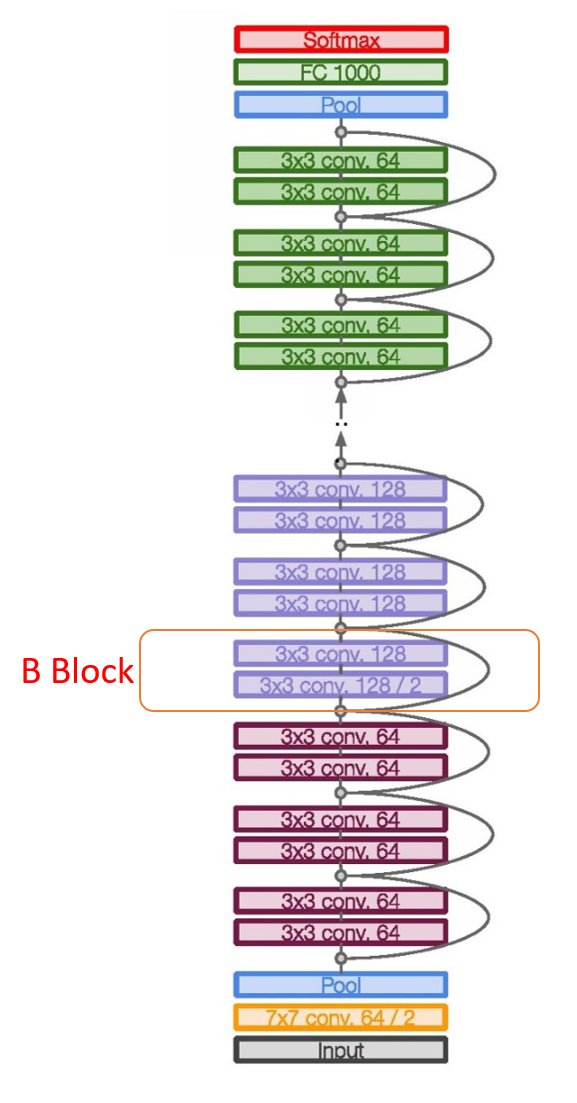

Image ref -> https://towardsdatascience.com/architecture-comparison-of-alexnet-vggnet-resnet-inception-densenet-beb8b116866d


In [34]:
# ResNet Architecture: 
display(Image(image_path + 'ResNet_b_block.PNG', width=350, unconfined=True))
print('Image ref -> https://towardsdatascience.com/architecture-comparison-of-alexnet-vggnet-resnet-inception-densenet-beb8b116866d')

In [35]:
def _residual_macroblock(block_func, filters, repetitions =3, kernel_size=3, strides_1stBlock = 1, use_bias=False, 
                                kernel_initialiser='he_normal', kernel_regulariser=regulisers.l2(1e-5), name='res_macroblock'):
    """ This builds the a Layer block that is composed of a repetition of 'N' number of residual blocks.
    Parameters:
        - block_fun, is the Block Layer method.
        - repetitions, is the number of times the block func is repeated inside.
        - filters, is the number of filters.
        - kernel_size, is the kernel size.
        - strides_1st_block, is the convolutional strides for the 1st block.
        - use_bias, is a Flag to use or not the bias in the convolution layer.
        - kernel_initialiser, is the kernel initialisation method name.
        - kernel_regulariser, is the kernel regulariser.
    Returns:
        - returns a Callable Layer Block.
    """
    def layer_func(x):
        
        # Loop through the specified number of repetitions:
        for i in range(repetitions):
            block_name = "{}_{}".format(name, i)
            strides = strides_1stBlock if i == 0 else 1
            x = block_func(filters = filters,
                           kernel_size = kernel_size,
                           strides = strides,
                           use_bias = use_bias,
                           kernel_initialiser = kernel_initialiser,
                           kernel_regulariser = kernel_regulariser,
                           name = block_name)(x)
            
        # Return the output from this loop:
        return x
    
    return layer_func
    

## 3.2.6 - Final Layers of the ResNet model:

Previously, the code blocks were to implement the layers of residual blocks before the final layers. The final layers of the ResNet model here will be composed of the 3 layers preceeding the residual blocks, that is a 7x7 convolution and a max-pooling layer, and also the final fully connected layers that leads to the prediction output.

The following function should call the defiend functions in the previous code blocks to form the final ResNet model (of any size).

In [36]:
def ResNet(input_shape, nb_classes = 1000, block_func = _residual_block_basic, repetitions = (2, 2, 2, 2),
           use_bias = False, kernel_initialiser = 'he_normal', kernel_regulariser = regulisers.l2(1e-5)):
    """ This builds the ResNet Model for the Classification task.
    Parameters:
        - input_shape, is the input data shape such as (224, 224, 3).
        - nb_classes, is the number of classes to be predicted.
        - block_func, is the Block Layer method to be used.
        - repetitions, is the List of repetitions for each macro-blocks the network should build/contain.
        - use_bias, is a Flag to use or not the bias in the convolution layer.
        - kernel_initialiser, is the kernel initialisation method name.
        - kernel_regulariser, is the kernel regulariser.
    Returns:
        - returns the ResNet model.
    """
    # ResNet's Input layer:
    inputs = Input(shape = input_shape)
    
    conv = _res_conv(filters = 64,
                    kernel_size= 7,
                    strides= 2,
                    use_relu= True,
                    use_bias= use_bias,
                    kernel_initialiser= kernel_initialiser,
                    kernel_regulariser= kernel_regulariser
                    )(inputs)
    
    maxpool = MaxPooling2D(pool_size= 3, 
                           strides= 2, 
                           padding='same')(conv)
    
    # Resnet's chain of Residual Blocks:
    filters = 64
    strides = 2
    res_block = maxpool
    
    for i, repet in enumerate(repetitions):
        # NOTE: no further input size reduction for the 1st block, as max-pooling was applied prior.
        block_strides = strides if i != 0 else 1
        
        macroblock_name = _residual_macroblock(block_func = block_func,
                                               filters = filtters,
                                               repetitions = repet,
                                               strides_1stBlock= block_strides,
                                               use_bias= use_bias,
                                               kernel_initialiser= kernel_initialiser,
                                               kernel_regulariser= kernel_regulariser,
                                               name = macroblock_name
                                              )(res_block)
        
        # Limit the number of filters to 1024 as the maximum:
        filters = min(filters * 2, 1024)   
    
    # Resnet's Final/Output Layer:
    res_spatial_dimen = tf.keras.backend.int_shape(res_block)[1:3]
    
    avg_pool = AveragePooling2D(pool_size= res_spatial_dimen,
                                strides 1
                               )(res_block)
    
    flatten = Flatten()(avg_pool)
    
    predictions = Dense(units = nb_classes,
                        activation = 'softmax',
                        kernel_initializer= kernel_initialiser
                       )(flatten)
    
    # Model (Keras API):
    model = Model(inputs = inputs, 
                  outputs = predictions)
    
    # Return the model configurations:
    return model


SyntaxError: invalid syntax (<ipython-input-36-71b73817f8b8>, line 57)

The above code block essentially allows for creation of a ResNet model that can be shallow or deep or very deep, with the use of the "repetitions" parameter.

## 4 - Instatiate the ResNet model: 

Here, it is possible to instantiate all of the classic ResNet models that were originally developed.

In [ ]:
def ResNet18()

## 4.1 -

## 5 -

## Summary:

Although this is not the end of this project, it does conclude the 1st notebook relevant to the theory of these advanced deep learning models. Please go to check out __Notebook 3__ for the __Keras Applications and reusing models__.